# Contexto De La Base
Este es un conjunto de datos que contienen los registros de venta de viviendas de una empresa de bienes raíces que ocurrieron entre 05/2014 al 5/2015, este contiene el precio de las ventas y características específicas de las viviendas.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Descripción de Aproximación
Aproximación por Curiosidad


In [ ]:
import pandas as pd #libreria de lectura de doc, matemática etc...
import numpy as np #Librería de algebra, y clave del data Science
import seaborn as sns # Una de las muchas  librerias para gráficos(con la que tengo familiaridad)
import scipy.stats as stats #Liberia de estadística
from matplotlib import pyplot as plt
import plotly.express as px
import random
#Se agregarán más en cuanto avance el temario de clase

# Objetivo del Estudio
A partir de una muestra, poder visualizar cuales son los factores que tienen una alta correlacion con el precio de las viviendas y asi poder ver la relacion entre estos y el precio.

# **Descripcion de las variables**

## **Categoricas**

Luxury: Es una variable binaria que indica si la vivienda se considera de lujo o no. Puede ser útil para segmentar o filtrar las propiedades según su nivel de exclusividad.

Waterfront: Es una variable binaria que indica si la vivienda tiene vista al agua (1) o no (0). Esta característica puede influir en el valor de la propiedad.

View: Representa una medida de la calidad de la vista desde la vivienda. Puede variar en una escala numérica, donde valores más altos indican vistas más atractivas.

Condition: Representa la condición general de la vivienda. Puede ser una variable categórica o numérica que indica el estado de conservación y mantenimiento de la propiedad.

Basement: Indica si la vivienda tiene un sótano (1) o no (0). Esta característica puede afectar la funcionalidad y el espacio utilizable de la propiedad.

## **Numericas**

Month: Este campo indica el mes en el que se registró la información de la vivienda. Puede ser útil para realizar análisis temporales o identificar patrones estacionales.

Price: Es el precio de venta de la vivienda. Esta variable es de especial interés, ya que es la que probablemente querrás predecir o analizar en relación con otras características.

Bedrooms: Representa el número de dormitorios en la vivienda. Indica la capacidad para albergar a residentes o invitados.

Bathrooms: Indica el número de baños en la vivienda. Al igual que los dormitorios, esta variable tiene relación con la capacidad de alojamiento y comodidad.

Sqft_living: Es el tamaño en pies cuadrados (sqft) del espacio habitable de la vivienda, es decir, el área interior total excluyendo el garaje, sótano u otras áreas no habitables.

Sqft_lot: Representa el tamaño en pies cuadrados del lote de terreno en el que se encuentra la vivienda. Indica el espacio disponible al aire libre.

Floors: Indica el número de pisos en la vivienda. Puede ser útil para evaluar la distribución vertical de la propiedad.


Sqft_above: Es el tamaño en pies cuadrados del espacio habitable sobre el nivel del suelo. Excluye el sótano u otras áreas no habitables.


Yr_built: Es el año de construcción de la vivienda. Puede ser relevante para evaluar la antigüedad de la propiedad.

Yr_renovated: Representa el año en que se realizó una renovación en la vivienda. Si no se ha renovado, es posible que tenga un valor nulo o cero.

Lat: Es la latitud geográfica de la ubicación de la vivienda. Proporciona información de la posición en el mapa.

Long: Es la longitud geográfica de la ubicación de la vivienda. También proporciona información de la posición en el mapa.


In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
df = pd.read_excel("/content/drive/MyDrive/EstadisticaProyecto/Viviendas/VentaViviendas.xlsx", index_col = 0)

df.head()

,month,price,Luxury,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,basement,yr_built,yr_renovated,lat,long
year,,,,,,,,,,,,,,,,,
2014,7,653450,1,3,2.5,2070,-1,1.0,0,0,C,1540,1,1980,0,47.5936,-122.013
2014,6,710000,1,2,1.5,1640,-1,1.5,0,0,A,1540,1,1916,0,47.6624,-122.325
2014,10,780000,1,4,3.5,3720,-1,1.0,0,1,B,3720,0,2007,0,47.3216,-121.940
2014,12,795000,1,3,3.5,2260,-1,2.0,0,0,B,1880,1,2003,0,47.6422,-122.361
2014,10,399950,0,3,2.0,2050,-1,1.0,0,0,A,1170,1,1960,0,47.7447,-122.328


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 2014 to 2015
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   month         5000 non-null   int64  
 1   price         5000 non-null   int64  
 2   Luxury        5000 non-null   int64  
 3   bedrooms      5000 non-null   int64  
 4   bathrooms     5000 non-null   float64
 5   sqft_living   5000 non-null   int64  
 6   sqft_lot      5000 non-null   int64  
 7   floors        5000 non-null   float64
 8   waterfront    5000 non-null   int64  
 9   view          5000 non-null   int64  
 10  condition     5000 non-null   object 
 11  sqft_above    5000 non-null   int64  
 12  basement      5000 non-null   int64  
 13  yr_built      5000 non-null   int64  
 14  yr_renovated  5000 non-null   int64  
 15  lat           5000 non-null   float64
 16  long          5000 non-null   float64
dtypes: float64(4), int64(12), object(1)
memory usage: 703.1+ KB


In [ ]:
#tamaño del dataSet [0:5000]
tam_muestra = 1750
viviendas= df.sample(n=tam_muestra, random_state=42) #es una muestra aleatoria de 1750 registros


In [ ]:
viviendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1750 entries, 2014 to 2014
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   month         1750 non-null   int64  
 1   price         1750 non-null   int64  
 2   Luxury        1750 non-null   int64  
 3   bedrooms      1750 non-null   int64  
 4   bathrooms     1750 non-null   float64
 5   sqft_living   1750 non-null   int64  
 6   sqft_lot      1750 non-null   int64  
 7   floors        1750 non-null   float64
 8   waterfront    1750 non-null   int64  
 9   view          1750 non-null   int64  
 10  condition     1750 non-null   object 
 11  sqft_above    1750 non-null   int64  
 12  basement      1750 non-null   int64  
 13  yr_built      1750 non-null   int64  
 14  yr_renovated  1750 non-null   int64  
 15  lat           1750 non-null   float64
 16  long          1750 non-null   float64
dtypes: float64(4), int64(12), object(1)
memory usage: 246.1+ KB


In [ ]:
viviendas.nunique()

month             12
price            850
Luxury             2
bedrooms          19
bathrooms         12
sqft_living      401
sqft_lot        1276
floors             5
waterfront         3
view               2
condition          5
sqft_above       366
basement           2
yr_built         116
yr_renovated      36
lat             1444
long             485
dtype: int64

In [ ]:
# Lista de columnas con menos de 10 valores distintos. Potenciales factores!
to_factor = list(viviendas.loc[:,viviendas.nunique() <= 10]);

# Podemos cambiar el tipo de todas ellas a factor de una vez
viviendas[to_factor] = viviendas[to_factor].astype('category')

In [ ]:
viviendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1750 entries, 2014 to 2014
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   month         1750 non-null   int64   
 1   price         1750 non-null   int64   
 2   Luxury        1750 non-null   category
 3   bedrooms      1750 non-null   int64   
 4   bathrooms     1750 non-null   float64 
 5   sqft_living   1750 non-null   int64   
 6   sqft_lot      1750 non-null   int64   
 7   floors        1750 non-null   category
 8   waterfront    1750 non-null   category
 9   view          1750 non-null   category
 10  condition     1750 non-null   category
 11  sqft_above    1750 non-null   int64   
 12  basement      1750 non-null   category
 13  yr_built      1750 non-null   int64   
 14  yr_renovated  1750 non-null   int64   
 15  lat           1750 non-null   float64 
 16  long          1750 non-null   float64 
dtypes: category(6), float64(3), int64(8)
memory usage

# Medidas de Dispersión

In [ ]:
viviendas.describe()

,month,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built,yr_renovated,lat,long
count,1750.000000,1.750000e+03,1750.000000,1750.000000,1750.000000,1.750000e+03,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000
mean,6.609143,5.492128e+05,3.637714,2.146571,2077.170857,1.499214e+04,1782.619429,1970.366857,93.528000,47.558191,-122.213883
std,3.082499,4.121054e+05,3.683467,0.838658,912.815589,4.664742e+04,817.457841,29.602266,421.958527,0.136682,0.141244
min,1.000000,1.000000e+05,0.000000,0.000000,370.000000,-1.000000e+00,370.000000,1900.000000,0.000000,47.164700,-122.505000
25%,4.000000,3.250000e+05,3.000000,1.500000,1420.000000,4.228250e+03,1200.000000,1950.250000,0.000000,47.475850,-122.327750
50%,6.000000,4.550000e+05,3.000000,2.500000,1930.000000,7.200000e+03,1550.000000,1973.500000,0.000000,47.572400,-122.227000
75%,9.000000,6.346000e+05,4.000000,2.500000,2550.000000,1.031275e+04,2210.000000,1996.000000,0.000000,47.675825,-122.126000
max,12.000000,7.062500e+06,66.000000,6.000000,10040.000000,1.164794e+06,7680.000000,2015.000000,2014.000000,47.777000,-121.352000


In [ ]:
viviendas.describe(exclude = np.number)

,Luxury,floors,waterfront,view,condition,basement
count,1750,1750.0,1750,1750,1750,1750
unique,2,5.0,3,2,5,2
top,0,1.0,0,0,B,0
freq,999,837.0,1683,1572,1149,1068


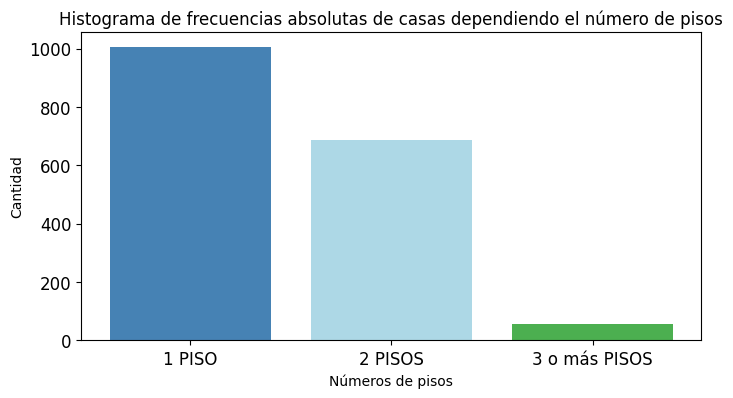

In [ ]:

#Estudio de numero de pisos por vivienda

viviendas['floors'] = viviendas['floors'].astype('int64') # ahorrar el número de comparaciones

plt.figure(figsize=(8, 4))
plt.title('Histograma de frecuencias absolutas de casas dependiendo el número de pisos')

A = viviendas[viviendas['floors'] == 1].value_counts().sum()
B = viviendas[viviendas['floors'] == 2].value_counts().sum()
C = viviendas[viviendas['floors'] >= 3].value_counts().sum()

total = A + B + C

plt.bar(['1 PISO', '2 PISOS', '3 o más PISOS'], [A, B, C]
        , color=['#4682B4', '#ADD8E6', '#4CAF50'])

plt.xlabel('Números de pisos')
plt.ylabel('Cantidad')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

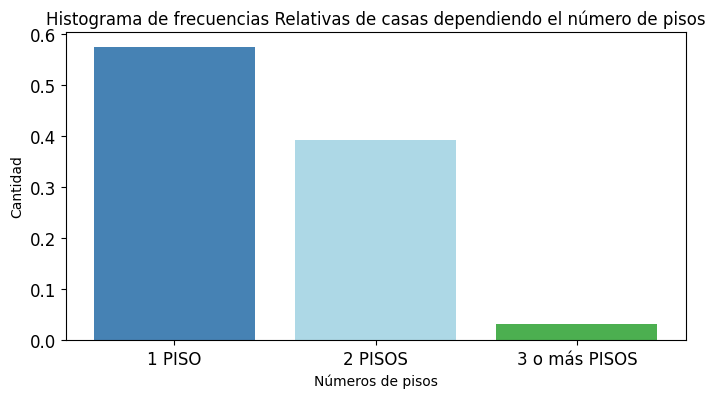

In [ ]:
#Estudio de numero de pisos por vivienda
plt.figure(figsize=(8, 4))
plt.title('Histograma de frecuencias Relativas de casas dependiendo el número de pisos')

plt.bar(['1 PISO', '2 PISOS', '3 o más PISOS'], [A/total, B/total, C/total]
        , color=['#4682B4', '#ADD8E6', '#4CAF50'])

plt.xlabel('Números de pisos')
plt.ylabel('Cantidad')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

En un principio realice el estudio de la cantidad de viviendas por cantidad de pisos obteniendo 5 categorías, pero me dí cuenta que el número de casas con más de tres pisos era muy pequeño y tampoco podia considerarlo como un outlier, por lo que tome la desición de juntar las demás categorías.
La consecuencia de esto es que a la hora de realizar un modelo predictivo en caso de querer agregarle interacción, se va a perder grados de libertad y significancia de la data manejada.


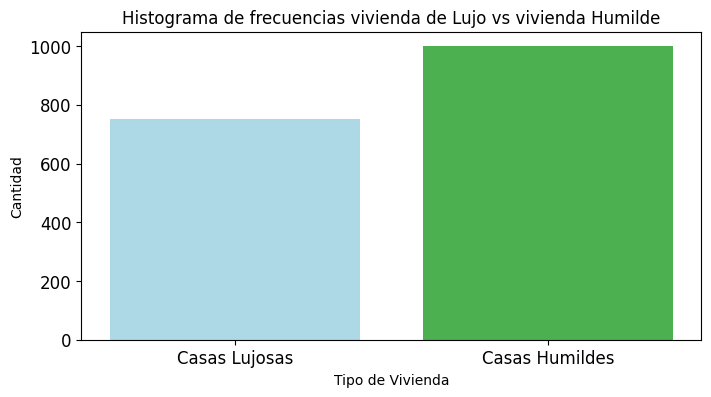

In [ ]:
#Estudio sobre la cantidad de viviendas de Lujo vs viviendas  Humildes
plt.figure(figsize=(8, 4))
plt.title('Histograma de frecuencias vivienda de Lujo vs vivienda Humilde')
Lujo = viviendas[viviendas['Luxury'] == 1].value_counts().sum()
Humilde = viviendas[viviendas['Luxury'] == 0].value_counts().sum()
total = Lujo + Humilde
plt.bar(['Casas Lujosas', 'Casas Humildes'], [Lujo, Humilde]
        , color=['#ADD8E6', '#4CAF50'])

plt.xlabel('Tipo de Vivienda')
plt.ylabel('Cantidad')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


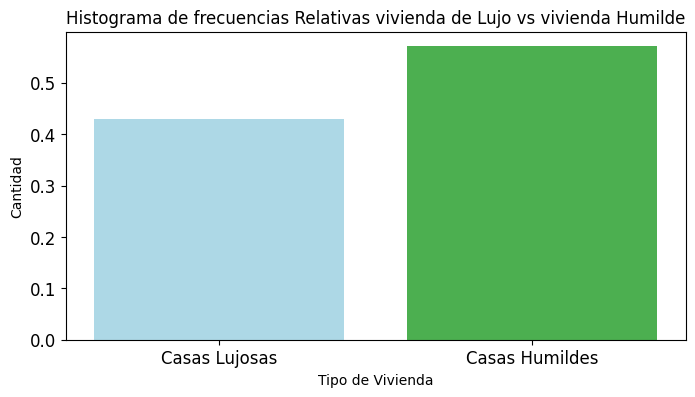

In [ ]:
#Estudio sobre la cantidad de viviendas de Lujo vs viviendas  Humildes
plt.figure(figsize=(8, 4))
plt.title('Histograma de frecuencias Relativas vivienda de Lujo vs vivienda Humilde')

plt.bar(['Casas Lujosas', 'Casas Humildes'], [Lujo/total, Humilde/total]
        , color=['#ADD8E6', '#4CAF50'])

plt.xlabel('Tipo de Vivienda')
plt.ylabel('Cantidad')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


Me parece increíble que no se encuentre mucha diferencia entre el número de casas Humildes vs Lujosas. Viendo esta gráfica podemos concluir que la empresa de vienes raíces debe ser muy buena, ya que maneja activos de personas con dinero.


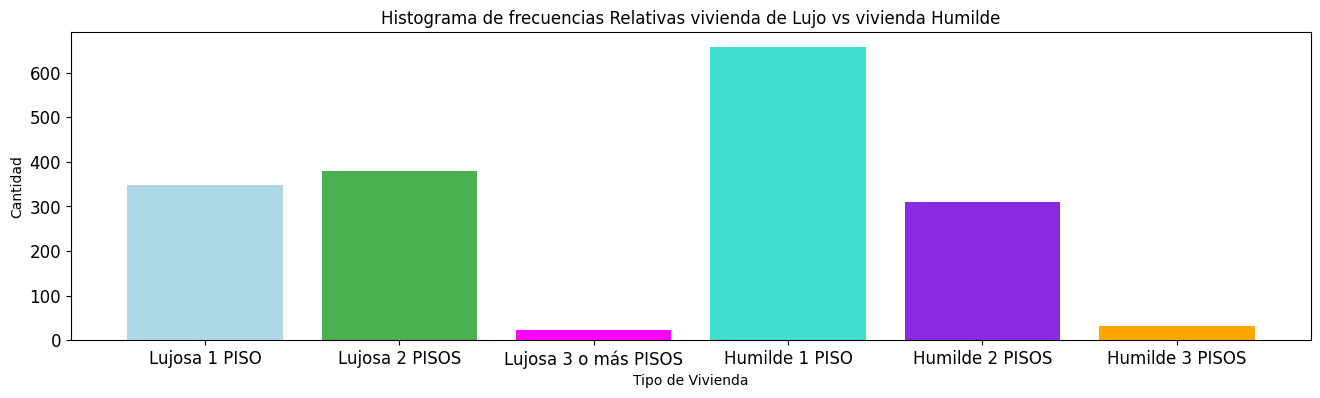

In [ ]:
#Relacion de Numero de pisos vs Tipo de vivienda (Lujosa o Humilde)
plt.figure(figsize=(16, 4))
plt.title('Histograma de frecuencias Relativas vivienda de Lujo vs vivienda Humilde')
LA = ((viviendas['Luxury'] == 1) & (viviendas['floors'] == 1)).sum()
LB = ((viviendas['Luxury'] == 1) & (viviendas['floors'] == 2)).sum()
LC = ((viviendas['Luxury'] == 1) & (viviendas['floors'] >= 3)).sum()
HA = ((viviendas['Luxury'] == 0) & (viviendas['floors'] == 1)).sum()
HB = ((viviendas['Luxury'] == 0) & (viviendas['floors'] == 2)).sum()
HC = ((viviendas['Luxury'] == 0) & (viviendas['floors'] >= 3)).sum()
total = LA + LB + LC + HA + HB +HC

plt.bar(['Lujosa 1 PISO', 'Lujosa 2 PISOS', 'Lujosa 3 o más PISOS', 'Humilde 1 PISO', 'Humilde 2 PISOS', 'Humilde 3 PISOS']
        , [LA, LB, LC, HA, HB, HC]
        , color=['#ADD8E6', '#4CAF50','#FF00FF', '#40E0D0','#8A2BE2','#FFA500'])

plt.xlabel('Tipo de Vivienda')
plt.ylabel('Cantidad')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()




Analizando esta gráfica podemos concluir lo siguiente: las variables sqft_Above, sqft_living, que son variables de espacio con respecto a la vivienda no son relevantes a la hora de determinar el tipo de casa, me parece contradictorio por una parte ya que los metros cuadrados habitables influyen mucho en los siguientes aspectos: número de dormitorios y baños.
Esto nos dice que a la hora de hacer el modelo algunos factores como la vista, el waterfront (vista al mar) y la ubicación tendrán mucha importancia a la hora de definir si una casa es Lujosa o Humilde, lo cual afectará el precio de la vivienda.

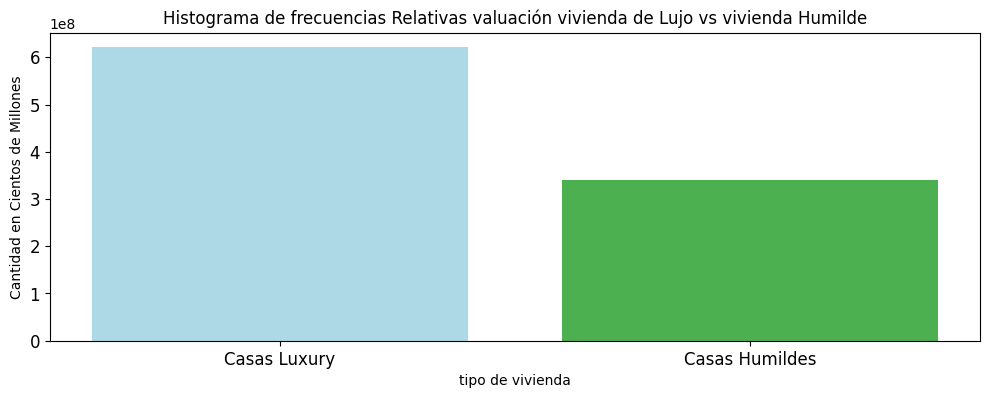

El promedio de valuacion de las casas lujosas es de $/ 826861.17 dólares
El promedio de valuacion de las casas humilde es de: $/ 340490.14 dólares


In [ ]:
plt.figure(figsize=(12, 4))
plt.title('Histograma de frecuencias Relativas valuación vivienda de Lujo vs vivienda Humilde')
suma_Luxury = viviendas[viviendas['Luxury'] == 1]['price'].sum()
promedio_lujosas = viviendas[viviendas['Luxury'] == 1]['price'].mean()
suma_humildes = viviendas[viviendas['Luxury'] == 0]['price'].sum()
promedio_humilde = viviendas[viviendas['Luxury'] == 0]['price'].mean()
plt.bar(['Casas Luxury', 'Casas Humildes'], [suma_Luxury, suma_humildes]
        , color=['#ADD8E6', '#4CAF50'])

plt.xlabel('tipo de vivienda')
plt.ylabel('Cantidad en Cientos de Millones')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()
print(f'El promedio de valuacion de las casas lujosas es de $/ {promedio_lujosas:.2f} dólares')
print(f'El promedio de valuacion de las casas humilde es de: $/ {promedio_humilde:.2f} dólares')


Como suponía, a pesar de ser menor cantidad de casas Lujosas supera por una cantidad significativa en términos de valuación. Esto tambien nos querra decir que el hecho de que una casa sea evaluada como 'Lujosa' aumente su precio significativamente.

In [ ]:
HumC = viviendas[(viviendas['Luxury'] == 0) & (viviendas['floors'] >= 3)]['price'].sum()
HumC_mean = viviendas[(viviendas['Luxury'] == 0) & (viviendas['floors'] >= 3)]['price'].mean()
print(f'El promedio de valuacion de las casas humildes es de $/ {HumC_mean:.2f} dólares')
HumB = viviendas[(viviendas['Luxury'] == 0) & (viviendas['floors'] == 2)]['price'].sum()
HumB_mean = viviendas[(viviendas['Luxury'] == 0) & (viviendas['floors'] == 2)]['price'].mean()
print(f'El promedio de valuacion de las casas humildes es de $/ {HumB_mean:.2f} dólares')
HumA = viviendas[(viviendas['Luxury'] == 0) & (viviendas['floors'] == 1)]['price'].sum()
HumA_mean = viviendas[(viviendas['Luxury'] == 0) & (viviendas['floors'] == 1)]['price'].mean()
print(f'El promedio de valuacion de las casas humildes es de $/ {HumA_mean:.2f} dólares')


El promedio de valuacion de las casas humildes es de $/ 383265.78 dólares
El promedio de valuacion de las casas humildes es de $/ 364663.08 dólares
El promedio de valuacion de las casas humildes es de $/ 327058.13 dólares


In [ ]:
minimoHC = viviendas[(viviendas['Luxury'] == 0) & (viviendas['floors'] >= 3)]['price'].min()
print(minimoHC)
maxHC = viviendas[(viviendas['Luxury'] == 0) & (viviendas['floors'] >= 3)]['price'].max()
print(maxHC)

maxHB = viviendas[(viviendas['Luxury'] == 0) & (viviendas['floors'] >= 2)]['price'].max()
print(maxHB)
minimoHB = viviendas[(viviendas['Luxury'] == 0) & (viviendas['floors'] == 2)]['price'].min()
print(minimoHB)
minHA = viviendas[(viviendas['Luxury'] == 0) & (viviendas['floors'] == 1)]['price'].max()
maxHA = viviendas[(viviendas['Luxury'] == 0) & (viviendas['floors'] == 1)]['price'].min()
print(minHA)
print(maxHA)

281000
479950
500000
158000
500000
100000


In [ ]:
#!pip install ydata_profiling

In [ ]:
#import ydata_profiling
#ydata_profiling.ProfileReport(viviendas)

In [ ]:
viviendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1750 entries, 2014 to 2014
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   month         1750 non-null   int64   
 1   price         1750 non-null   int64   
 2   Luxury        1750 non-null   category
 3   bedrooms      1750 non-null   int64   
 4   bathrooms     1750 non-null   float64 
 5   sqft_living   1750 non-null   int64   
 6   sqft_lot      1750 non-null   int64   
 7   floors        1750 non-null   int64   
 8   waterfront    1750 non-null   category
 9   view          1750 non-null   category
 10  condition     1750 non-null   category
 11  sqft_above    1750 non-null   int64   
 12  basement      1750 non-null   category
 13  yr_built      1750 non-null   int64   
 14  yr_renovated  1750 non-null   int64   
 15  lat           1750 non-null   float64 
 16  long          1750 non-null   float64 
dtypes: category(5), float64(3), int64(9)
memory usage

In [ ]:
# Eliminar variable objetivo continua
varObj = viviendas['price']
imputviviendas = viviendas.drop(['price'],axis=1)

# Analisis de Correlacion
Primero calcular las correlaciones entre las variables para identificar posibles relaciones lineales entre ellas y el precio. Las correlaciones te ayudarán a identificar qué características parecen estar más asociadas con el precio.

Queremos saber cuales son las variables que tienen una correlacion fuerte con el precio (variable objetivo) para ver si tienen una relacion causa-efecto.

In [ ]:
def cramers_v(var1, varObj):

    if not var1.dtypes == 'category':
        #bins = min(5,var1.value_counts().count())
        var1 = pd.cut(var1, bins = 5)
    if not varObj.dtypes == 'category': #np.issubdtype(varObj, np.number):
        #bins = min(5,varObj.value_counts().count())
        varObj = pd.cut(varObj, bins = 5)

    data = pd.crosstab(var1, varObj).values
    vCramer = stats.contingency.association(data, method = 'cramer')
    return vCramer
# Aplicar la función al input completo contra la objetivo
tablaCramer = pd.DataFrame(imputviviendas.apply(lambda x: cramers_v(x,varObj)),columns=['VCramer'])
px.bar(tablaCramer,x=tablaCramer.VCramer,title='Relaciones frente al Precio').update_yaxes(categoryorder="total ascending")

#Este gráfico nos dice que variables tienen más importancia y más relevancia frente a la variable objetivo,
#esto quiere decir que entre mayor puntuacion se tenga en estas variables,
#mayor probabilidad de que el cliente haya dicho que esta satisfecho y lo mismo en caso contrario.
#USAR ESTA EN CASO DE UN DATASET CON MUCHAS VARIABLES
#cramertop7 = tablaCramer.VCramer.sort_values(ascending=False)[:12]
#cramertop7 = pd.DataFrame(cramertop7,columns=['VCramer'])
#px.bar(cramertop7,x=cramertop7.VCramer,title='Relaciones frente a Satisfacción').update_yaxes(categoryorder="total ascending").show()



<ipython-input-25-d60cd6f06815>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



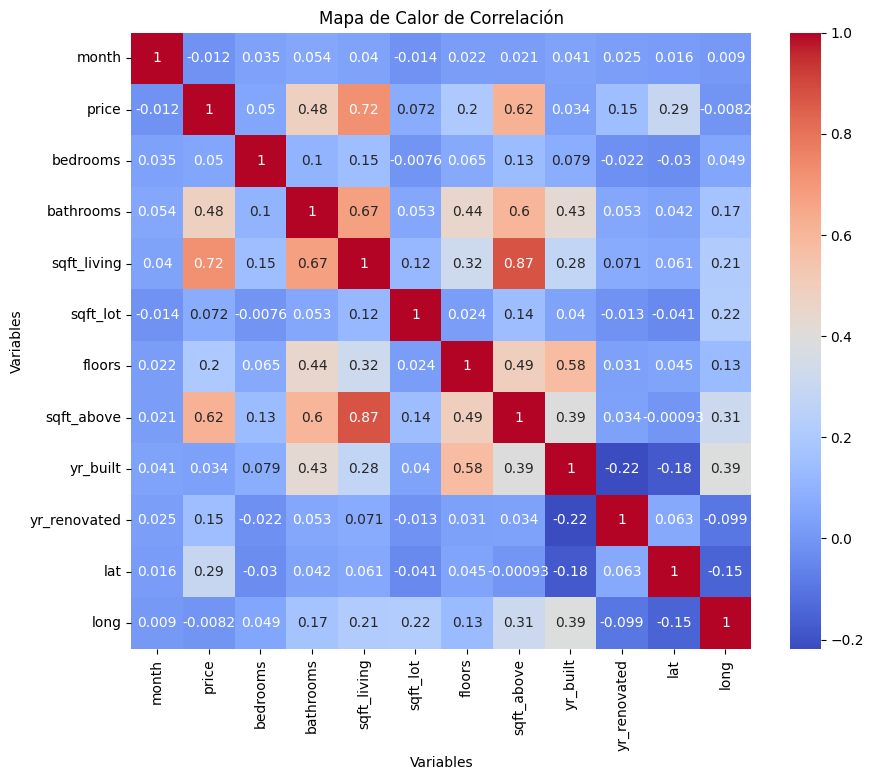

In [ ]:
correlation_matrix = viviendas.corr()  # Calcula la matriz de correlación
plt.figure(figsize=(10, 8))



# Generar el mapa de calor utilizando Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')



# Personalizar el mapa de calor
plt.title('Mapa de Calor de Correlación')
plt.xlabel('Variables')
plt.ylabel('Variables')



# Mostrar el mapa de calor
plt.show()

sqt_living es la variable que mas se acerca a la variable objetivo siendo esta el precio de las viviendas

**Pregunta inicial:** ¿Existe una relación entre el tamaño del área habitable (sqft_living) y el precio de las viviendas?

**Tendran estas dos variables una relacion grafica evidente?**

Text(0.5, 1.0, 'Diagrama de dispersion')

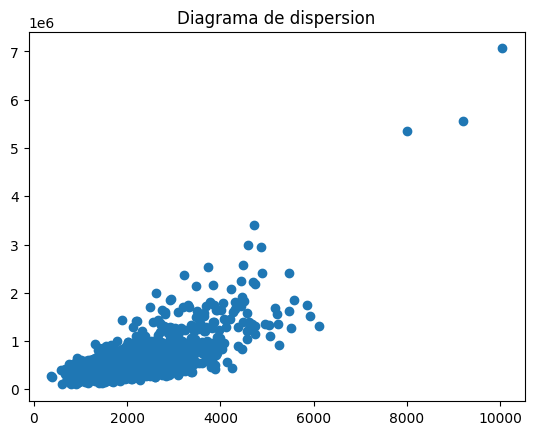

In [ ]:
plt.scatter(viviendas['sqft_living'], viviendas['price'])
plt.title('Diagrama de dispersion')

Si poseen algo de relacion segun el diagrama de dispercion,asique pasamos a la siguiente pregunta.

**Tendran estas dos variables una relacion Causa-Efecto?**

In [ ]:
import statsmodels.api as sm



X = viviendas['sqft_living']
y = viviendas['price']



# Agregar una constante a X para estimar el término de intercepción
X = sm.add_constant(X)



# Crear un modelo de regresión lineal
model = sm.OLS(y, X)



# Ajustar el modelo a los datos
results = model.fit()



# Generar el resumen de la regresión
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     1878.
Date:                Tue, 25 Jul 2023   Prob (F-statistic):          3.25e-279
Time:                        01:21:13   Log-Likelihood:                -24470.
No. Observations:                1750   AIC:                         4.894e+04
Df Residuals:                    1748   BIC:                         4.896e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.256e+05    1.7e+04     -7.385      

**Despues de realizar la regresion lineal obtuvimos la siguiente informacion:**

1. El r^2 es 0.518 esto nos muestra que el modelo explica la mitad de la variabilidad, no es 0.75 pero aun asi es mas de la mitad.
2. El F y F Significativo nos muestran que el modelo es estadisticamente significativo, ya que el F significativo es menor al alpha 0.01, 0.05 y 0.1.
3. El coeficiente de sqft_living nos muestra que tiene un impacto positivo en el precio.

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Supongamos que 'df' es tu DataFrame que contiene todas las variables relevantes.

# Definir las variables predictoras (X) y la variable objetivo (y)
X = imputviviendas[['sqft_living', 'view', 'Luxury']]  # Variables predictoras
X = sm.add_constant(X)  # Agregar una constante para el término de intercepción
y = varObj  # Variable objetivo

# Crear un modelo de regresión lineal múltiple
model = sm.OLS(y, X)

# Ajustar el modelo a los datos
results = model.fit()

# Generar el resumen de la regresión
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     886.7
Date:                Tue, 25 Jul 2023   Prob (F-statistic):               0.00
Time:                        01:21:13   Log-Likelihood:                -24298.
No. Observations:                1750   AIC:                         4.860e+04
Df Residuals:                    1746   BIC:                         4.863e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.306e+04   1.57e+04     -4.663      

**Mejora del modelo:** Para mejorar el modelo agregamos las variables view y Luxury, esto hizo que el r^2 aumentara hasta un 0.60 que es un gran aumento

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Supongamos que 'imputviviendas' es tu DataFrame

# Definir las variables predictoras y la variable objetivo
predictors = ['bedrooms', 'bathrooms', 'sqft_living']
interaction_terms = ['bedrooms:bathrooms', 'bedrooms:sqft_living', 'bathrooms:sqft_living']


# Crear las variables de interacción en el DataFrame
for term in interaction_terms:
    var1, var2 = term.split(':')
    imputviviendas[term] = imputviviendas[var1] * imputviviendas[var2]

# Agregar una constante a las variables predictoras
X = sm.add_constant(imputviviendas[predictors + interaction_terms])

# Crear el modelo de regresión lineal con términos de interacción
model = sm.OLS(varObj, X)

# Ajustar el modelo a los datos
results = model.fit()

# Generar el resumen de la regresión
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     479.0
Date:                Tue, 25 Jul 2023   Prob (F-statistic):               0.00
Time:                        01:21:13   Log-Likelihood:                -24256.
No. Observations:                1750   AIC:                         4.853e+04
Df Residuals:                    1743   BIC:                         4.856e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4.491e+

# **Conclusion**
Podemos concluir que con base en los resultados y la significancia estadística del coeficiente de sqft_living en el modelo de regresión, se puede concluir que sqft_living es una variable relevante y puede ser utilizada para la aproximación o predicción del precio de las viviendas y que para mejorar el modelo podemos agregar otras variables como las vistas y la lujosidad de las viviendas.